# Régression linéaire : cette faiblesse que beaucoup négligent

[Lien du post MonShotData](https://www.monshotdata.com/p/faiblesse-regression-lineaire)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression, RANSACRegressor

sns.set()

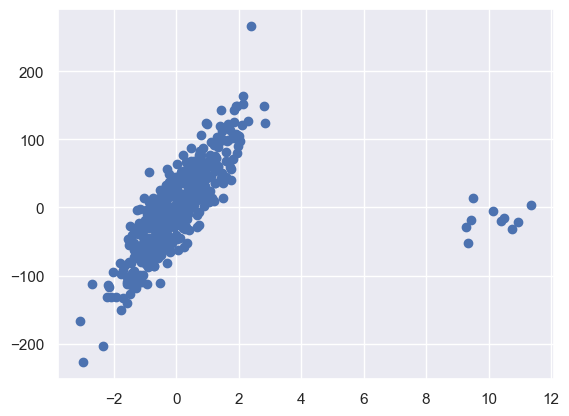

In [2]:
N_SAMPLES = 500
N_OUTLIERS = 10

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES, 
    n_features=1, 
    n_informative=1, 
    noise=30, 
    coef=True, 
)

coef_list = [["original_coef", float(coef)]]

X[:N_OUTLIERS] = 10 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[:N_OUTLIERS] = -15 + 20 * np.random.normal(size=N_OUTLIERS)

plt.scatter(X, y);

## Régression linéaire

In [3]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

In [4]:
plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

In [5]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

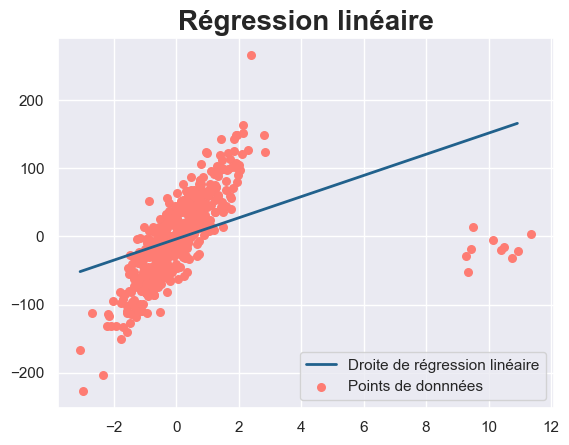

In [6]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "linear_regression", c = colors[8], lw=2, label="Droite de régression linéaire")
plt.scatter(X, y, c = colors[0], s = 30,  label = "Points de donnnées")
plt.legend(loc="lower right")
plt.title("Régression linéaire", fontsize=20, fontweight = "bold")
plt.show();

## Régression RANSAC

In [7]:
ransac = RANSACRegressor().fit(X, y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

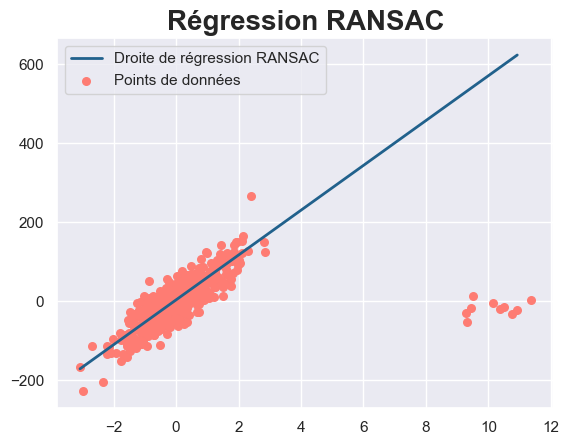

In [8]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "ransac_regression", c = colors[8], lw=2, label="Droite de régression RANSAC")
plt.scatter(X, y, c = colors[0], s = 30, label = "Points de données")
plt.legend()
plt.title("Régression RANSAC", fontsize=20, fontweight = "bold")

plt.show();